<a href="https://colab.research.google.com/github/soaresbru/bootcamp-Unimed-Data-science/blob/main/An%C3%A1lise%20explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando as bibliotecas padrões
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

In [ ]:
#lendo os arquivos
midia = pd.read_excel('/content/Gasto com Mídia.xlsx')
origem = pd.read_csv('/content/ORIGEM_TRAFEGO.csv', delimiter=';')
clientes = pd.read_parquet('/content/cadastro_clientes.parquet')

Analisando o arquivo de mídia

In [ ]:
midia.head()

,Dia,Facebook Ads,Google Ads
0,2020-01-01,620.02,987.46
1,2020-01-02,596.95,1165.32
2,2020-01-03,691.31,876.76
3,2020-01-04,554.15,804.85
4,2020-01-05,696.08,899.13


In [ ]:
midia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dia           456 non-null    datetime64[ns]
 1   Facebook Ads  456 non-null    float64       
 2   Google Ads    456 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.8 KB


In [ ]:
midia.describe()

,Facebook Ads,Google Ads
count,456.000000,456.000000
mean,1535.800461,809.000197
std,1146.435285,734.727751
min,0.000000,140.830000
25%,729.662500,456.072500
50%,1040.945000,615.595000
75%,2233.162500,825.445000
max,6151.030000,7899.190000


In [ ]:
midia.sum().sort_values(ascending=False)
#é possível observar que o total gasto com mídia foi bem maior com Facebook do que com Google
# Então é esperado mais pessoas vindo do Facebook

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Facebook Ads    700325.01
Google Ads      368904.09
dtype: float64

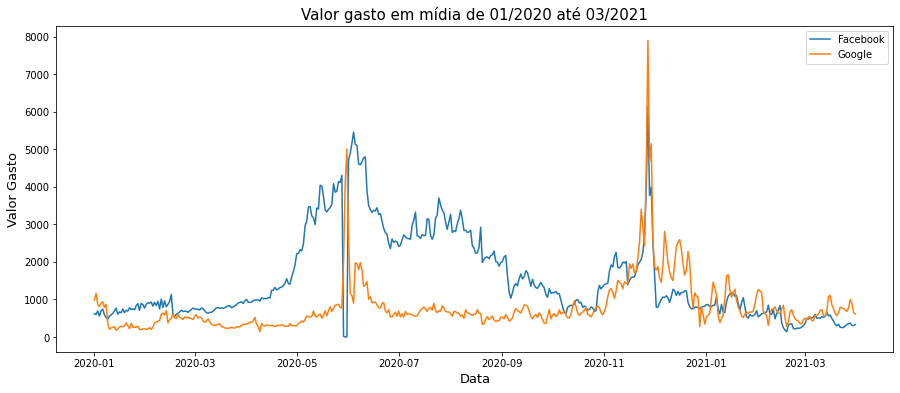

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(midia['Dia'],midia['Facebook Ads'], label='Facebook')
plt.plot(midia['Dia'],midia['Google Ads'], label='Google')

plt.title("Valor gasto em mídia de 01/2020 até 03/2021",fontsize=15)
plt.xlabel("Data",fontsize=13)
plt.ylabel("Valor Gasto",fontsize=13)
plt.legend()
plt.show()

Analisando a origem do tráfego

In [ ]:
origem.head()

,PEDIDO_ERP,CANAL_MARKETING
0,P10000123123,Google Ads
1,P10000123124,Facebook Ads
2,P10000123125,Email
3,P10000123126,Direto
4,P10000123127,Busca orgânica


In [ ]:
origem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172031 entries, 0 to 172030
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PEDIDO_ERP       172031 non-null  object
 1   CANAL_MARKETING  151600 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [ ]:
origem.groupby(['CANAL_MARKETING'])['CANAL_MARKETING'].count().sort_values(ascending=False)
#Observa-se que a maior parte vem do Google Ads
#Dessa forma pode ser que está gastando dinheiro demais em Facebook Ads para obter pouco retorno

CANAL_MARKETING
Google Ads        60935
Busca orgânica    28287
Direto            17270
Facebook Ads      14780
Referência        10890
Outros            10065
Email              9373
Name: CANAL_MARKETING, dtype: int64

Analisando os clientes

In [ ]:
clientes.head()

,COD_CLIENTE,IDADE,UF,REGIAO,RENDA_PRESUMIDA
0,4000001,31.0,AL,Nordeste,6471.90
1,4000002,51.0,RN,Nordeste,7431.55
2,4000003,51.0,RR,Norte,8827.41
3,4000004,33.0,MG,Sudeste,7978.01
4,4000005,39.0,SP,Sudeste,7532.21


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146333 entries, 0 to 146332
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   COD_CLIENTE      146333 non-null  int64  
 1   IDADE            146333 non-null  float64
 2   UF               146333 non-null  object 
 3   REGIAO           146333 non-null  object 
 4   RENDA_PRESUMIDA  146333 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.6+ MB


In [ ]:
clientes.describe()
# A média e a mediana da idade é relativamente próxima, os mesmo acontece com a renda presumida

,COD_CLIENTE,IDADE,RENDA_PRESUMIDA
count,1.463330e+05,146333.000000,146333.000000
mean,4.073167e+06,37.570001,7725.349091
std,4.224284e+04,10.134532,790.240388
min,4.000001e+06,16.000000,4508.700000
25%,4.036584e+06,30.000000,7208.840000
50%,4.073167e+06,36.000000,7673.250000
75%,4.109750e+06,46.000000,8174.280000
max,4.146333e+06,82.000000,37943.110000


(array([ 5374., 28751., 37263., 29494., 20454., 19503.,  4353.,   609.,
          325.,   207.]),
 array([16. , 22.6, 29.2, 35.8, 42.4, 49. , 55.6, 62.2, 68.8, 75.4, 82. ]),
 <a list of 10 Patch objects>)

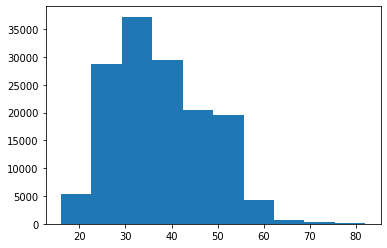

In [ ]:
plt.hist(clientes['IDADE'])
# Então aparentemente o público maior da empresa é de 22 até 55 anos

(array([8.7423e+04, 5.8527e+04, 3.5200e+02, 2.3000e+01, 4.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 4508.7  ,  7852.141, 11195.582, 14539.023, 17882.464, 21225.905,
        24569.346, 27912.787, 31256.228, 34599.669, 37943.11 ]),
 <a list of 10 Patch objects>)

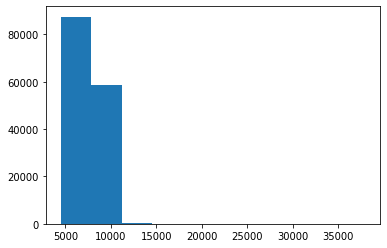

In [ ]:
plt.hist(clientes['RENDA_PRESUMIDA'])
# esse gráfico ficou mais difícil de observar pois existe uma renda de quase 38000, então no próximo gráfico vamos focar em na maior parte dos dados

(array([3.0000e+00, 1.7940e+03, 4.1362e+04, 7.8819e+04, 2.1636e+04,
        2.0750e+03, 3.9200e+02, 1.1500e+02, 8.1000e+01, 3.2000e+01]),
 array([ 4000.,  5100.,  6200.,  7300.,  8400.,  9500., 10600., 11700.,
        12800., 13900., 15000.]),
 <a list of 10 Patch objects>)

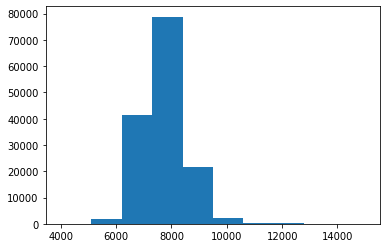

In [ ]:
plt.hist(clientes['RENDA_PRESUMIDA'], range=(4000,15000))
# Vendo apenas valore de renda entre 4000 até 15000, pois é onde está a maior parte dos dados

In [ ]:
clientes.groupby(['REGIAO'])['REGIAO'].count().sort_values(ascending=False)

REGIAO
Sudeste         60023
Nordeste        41965
Norte           15336
Sul             15145
Centro-Oeste    13864
Name: REGIAO, dtype: int64

In [ ]:
c =clientes.groupby(['REGIAO'])['REGIAO'].count().sort_values(ascending=False)
c /c.sum()

REGIAO
Sudeste         0.410181
Nordeste        0.286777
Norte           0.104802
Sul             0.103497
Centro-Oeste    0.094743
Name: REGIAO, dtype: float64

Olhando para a distribuição populacional do Brasil, temos:
Sudeste - 42,2% ; 
Nordeste - 27,2% ;
Sul - 14,3% ;
Norte - 8,6% ;
Centro-Oeste - 7,7% 

In [ ]:
#A porcentagem de clientes é parecida com a porcentagem populacional, A região que ficou mais diferente foi a Sudeste, dessa forma pode
# ser uma boa opção investir mais na região

In [ ]:
clientes.groupby(['UF'])['UF'].count().sort_values(ascending=False)

UF
SP    31413
MG    15201
RJ    10789
BA     9571
PA     7480
CE     6440
PE     6405
PR     6334
GO     5786
RS     5381
RN     4818
MA     4536
SC     3430
AM     3419
SE     3093
MT     2947
DF     2699
ES     2620
PB     2436
MS     2432
AL     2429
PI     2237
RO     1464
TO     1120
AP      670
AC      658
RR      525
Name: UF, dtype: int64

In [ ]:
# pode-se observar que a empresa tem clientes de todos os estados do Brasil mais o Distrito Federal

In [ ]:
len(clientes.groupby(['UF'])['UF'].count().sort_values(ascending=False))

27

Analisando agora um pouco mais o banco de dados SQL

In [ ]:
#lendo o arquivo sql
engine_str = 'sqlite:///dados/vaistore.sqlite'
engine = sqlalchemy.create_engine(engine_str)

# já temos a engine! Vamos ver as tableas em um DB 
table_names = sqlalchemy.inspect(engine).get_table_names()
print(table_names)

['info_produto', 'pedidos']


In [ ]:
with engine.connect() as con:                  # conecta dentro do with
    rs = con.execute("SELECT * FROM info_produto")    # executa a query
    df = pd.DataFrame(rs.fetchmany(size=5))    # pega os resultados - aqui usamos fetchmany para pegar o numero específico de linhas
    df.columns = rs.keys()                     # pega o nome das colunas
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUTO           5 non-null      object 
 1   CUSTO_MERCADORIA  5 non-null      float64
 2   LINHA_PRODUTO     5 non-null      object 
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


In [ ]:
with engine.connect() as con:                  # conecta dentro do with
    rs = con.execute("SELECT * FROM pedidos")    # executa a query
    df = pd.DataFrame(rs.fetchmany(size=5))    # pega os resultados - aqui usamos fetchmany para pegar o numero específico de linhas
    df.columns = rs.keys()                     # pega o nome das colunas
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATA_VENDA          5 non-null      object 
 1   PEDIDO              5 non-null      int64  
 2   PEDIDO_ERP          5 non-null      object 
 3   COD_CLIENTE         5 non-null      int64  
 4   PRODUTO             5 non-null      object 
 5   QTDE                5 non-null      int64  
 6   PRECO_UNITARIO      5 non-null      float64
 7   DESCONTO_ITEM       5 non-null      float64
 8   FRETE_PAGO_CLIENTE  5 non-null      float64
 9   RECEITA             5 non-null      float64
 10  CUSTO_FRETE         5 non-null      float64
dtypes: float64(5), int64(3), object(3)
memory usage: 568.0+ bytes


In [ ]:
info = pd.read_sql_query("SELECT * FROM info_produto", engine)
info.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO
0,A10001G,21.1,BASICO
1,A10002M,21.1,BASICO
2,A10003M,22.6,BASICO
3,A10004P,22.6,BASICO
4,A10005M,22.6,BASICO


In [ ]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUTO           1681 non-null   object 
 1   CUSTO_MERCADORIA  1681 non-null   float64
 2   LINHA_PRODUTO     1192 non-null   object 
dtypes: float64(1), object(2)
memory usage: 39.5+ KB


In [ ]:
info.describe()
# Nota-se que a maioria do produtos é relativamente barato

,CUSTO_MERCADORIA
count,1681.000000
mean,27.787252
std,44.747764
min,0.520000
25%,8.540000
50%,17.200000
75%,32.710000
max,898.220000


(array([1.618e+03, 4.700e+01, 1.000e+01, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([5.2000e-01, 9.0290e+01, 1.8006e+02, 2.6983e+02, 3.5960e+02,
        4.4937e+02, 5.3914e+02, 6.2891e+02, 7.1868e+02, 8.0845e+02,
        8.9822e+02]),
 <a list of 10 Patch objects>)

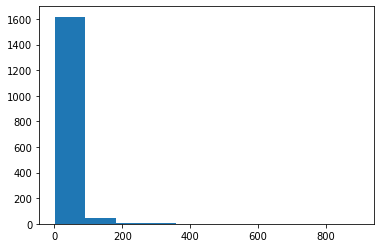

In [ ]:
plt.hist(info['CUSTO_MERCADORIA'])

(array([531., 399., 279., 153., 101.,  68.,  41.,  22.,  22.,   9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

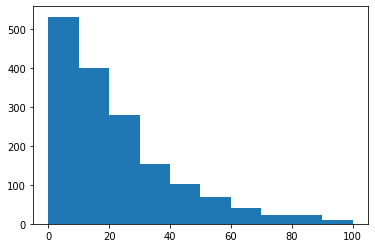

In [ ]:
plt.hist(info['CUSTO_MERCADORIA'], range=(0,100))
# É possível observar que o produto vai ficando mais caro, a quantidade de produtos diferentes vai diminuindo

In [ ]:
info.groupby(['LINHA_PRODUTO'])['LINHA_PRODUTO'].count().sort_values(ascending=False)
#pela divisão de segmentos vemos que a maioria do produtos é básico

LINHA_PRODUTO
BASICO          415
FASHION         276
ACESSORIOS      232
BOLSAS          185
TECH             78
COMPLEMENTOS      6
Name: LINHA_PRODUTO, dtype: int64

In [ ]:
pedidos = pd.read_sql_query("SELECT * FROM pedidos", engine)
pedidos.head()
#nota-se que quando o desconto é positivo, o cliente paga a mais

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57


In [ ]:
pedidos.describe()
#Este desconto de 7135.200 está chamando a atenção

,PEDIDO,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
count,2.969370e+05,2.969370e+05,296937.000000,296937.000000,296937.000000,296937.000000,296937.000000,296937.000000
mean,8.245409e+06,4.071741e+06,1.096071,88.702216,-3.320825,7.565462,96.737892,10.695023
std,9.617816e+07,4.240777e+04,0.732218,91.983725,20.480290,7.902874,97.317731,10.387043
min,7.000001e+06,4.000001e+06,1.000000,1.000000,-7135.200000,0.000000,1.080000,0.000000
25%,7.045000e+06,4.034865e+06,1.000000,29.900000,0.000000,0.000000,32.900000,4.080000
50%,7.092251e+06,4.070934e+06,1.000000,59.900000,0.000000,6.400000,69.900000,8.090000
75%,7.128757e+06,4.107895e+06,1.000000,129.900000,0.000000,12.900000,137.410000,14.580000
max,8.000000e+09,4.146333e+06,100.000000,2499.900000,80.000000,147.320000,8001.100000,324.990000


In [ ]:
pedidos[pedidos['DESCONTO_ITEM']<-1000]
# Nota-se descontos surreais quando alguns itens são comprados em grande quantidade

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
140261,2020-10-21 00:00:00.000000,7105063,P10000227569,4128796,E10725Y,6,229.9,-1205.58,0.0,173.82,29.89
164969,2020-10-21 00:00:00.000000,7105063,P10000227569,4128796,E10795Y,6,329.9,-1729.98,0.0,249.42,42.89
164970,2020-10-21 00:00:00.000000,7105063,P10000227569,4128796,E10817Y,6,229.9,-1205.58,0.0,173.82,29.89
230505,2021-01-21 00:00:00.000000,7161259,P10000283598,4128796,E10822Y,6,189.9,-1003.80,0.0,135.60,24.69
238633,2020-12-11 00:00:00.000000,7144494,P10000266924,4013903,E10780Y,30,159.9,-2230.50,0.0,2566.50,20.79
242326,2020-10-22 00:00:00.000000,7105490,P10000228017,4113368,E10539Y,60,139.9,-7135.20,0.0,1258.80,18.19
277931,2020-12-01 00:00:00.000000,7137604,P10000260118,4093216,E10744Y,4,499.9,-1499.68,0.0,499.92,64.99


Agora vamos juntar as tabelas

In [ ]:
m4 = pd.merge(info, pedidos, how = 'outer', on='PRODUTO')
m4.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
0,A10001G,21.1,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,59.9,0.0,4.30,64.20,4.30
1,A10001G,21.1,BASICO,2020-09-04 00:00:00.000000,7093740,P10000216261,4017261,1,59.9,0.0,0.00,59.90,7.79
2,A10002M,21.1,BASICO,2021-01-22 00:00:00.000000,7161508,P10000283866,4110263,1,59.9,0.0,0.00,59.90,7.79
3,A10002M,21.1,BASICO,2021-01-02 00:00:00.000000,7155350,P10000277710,4011082,1,59.9,0.0,3.23,63.13,3.23
4,A10003M,22.6,BASICO,2020-09-04 00:00:00.000000,7093740,P10000216261,4017261,1,59.9,0.0,0.00,59.90,7.79


In [ ]:
m3 = pd.merge(m4, clientes, how = 'outer', on='COD_CLIENTE')
m3.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,IDADE,UF,REGIAO,RENDA_PRESUMIDA
0,A10001G,21.10,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,59.9,0.0,4.30,64.20,4.30,32.0,SP,Sudeste,8890.73
1,A10008G,24.23,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,64.9,0.0,4.30,69.20,4.30,32.0,SP,Sudeste,8890.73
2,A10012G,27.13,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,79.9,0.0,4.30,84.20,4.30,32.0,SP,Sudeste,8890.73
3,B10057G,8.70,BASICO,2020-03-14 00:00:00.000000,7010753,P10000133510,4019515,1,29.9,0.0,2.76,32.66,2.76,32.0,SP,Sudeste,8890.73
4,B10058G,8.70,BASICO,2020-03-14 00:00:00.000000,7010753,P10000133510,4019515,1,29.9,0.0,2.76,32.66,2.76,32.0,SP,Sudeste,8890.73


In [ ]:
m2 = pd.merge(m3, origem, how = 'outer', on='PEDIDO_ERP')
m2.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,IDADE,UF,REGIAO,RENDA_PRESUMIDA,CANAL_MARKETING
0,A10001G,21.10,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,59.9,0.0,4.30,64.20,4.30,32.0,SP,Sudeste,8890.73,Email
1,A10008G,24.23,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,64.9,0.0,4.30,69.20,4.30,32.0,SP,Sudeste,8890.73,Email
2,A10012G,27.13,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,79.9,0.0,4.30,84.20,4.30,32.0,SP,Sudeste,8890.73,Email
3,B10057G,8.70,BASICO,2020-03-14 00:00:00.000000,7010753,P10000133510,4019515,1,29.9,0.0,2.76,32.66,2.76,32.0,SP,Sudeste,8890.73,Email
4,B10058G,8.70,BASICO,2020-03-14 00:00:00.000000,7010753,P10000133510,4019515,1,29.9,0.0,2.76,32.66,2.76,32.0,SP,Sudeste,8890.73,Email


Agora vamos calcular a margem e fazer uma avaliação dela

In [ ]:
m2['margem'] = m2['RECEITA'] - (m2['CUSTO_FRETE'] + (m2['CUSTO_MERCADORIA'] * m2['QTDE'] ) + m2['RECEITA']*0.275)

In [ ]:
m2.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,IDADE,UF,REGIAO,RENDA_PRESUMIDA,CANAL_MARKETING,margem
0,A10001G,21.10,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,59.9,0.0,4.30,64.20,4.30,32.0,SP,Sudeste,8890.73,Email,21.1450
1,A10008G,24.23,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,64.9,0.0,4.30,69.20,4.30,32.0,SP,Sudeste,8890.73,Email,21.6400
2,A10012G,27.13,BASICO,2020-11-03 00:00:00.000000,7110620,P10000233167,4019515,1,79.9,0.0,4.30,84.20,4.30,32.0,SP,Sudeste,8890.73,Email,29.6150
3,B10057G,8.70,BASICO,2020-03-14 00:00:00.000000,7010753,P10000133510,4019515,1,29.9,0.0,2.76,32.66,2.76,32.0,SP,Sudeste,8890.73,Email,12.2185
4,B10058G,8.70,BASICO,2020-03-14 00:00:00.000000,7010753,P10000133510,4019515,1,29.9,0.0,2.76,32.66,2.76,32.0,SP,Sudeste,8890.73,Email,12.2185


In [ ]:
m2.groupby(['PRODUTO'])['margem'].mean().sort_values(ascending=False)
# margem média por produto
# os produtos com margem negativa devem ser retirados e margem positiva devem ser estimulados

PRODUTO
E10542Y    2537.902500
E10808Y     719.246724
E10770Y     691.589562
E10026Y     681.264201
E10922Y     619.092500
              ...     
E10369Y     -19.330402
D10002      -22.550187
D10385      -23.210958
E10154Y     -30.841625
D10003      -30.898750
Name: margem, Length: 1681, dtype: float64

In [ ]:
m2.groupby(['LINHA_PRODUTO'])['margem'].mean().sort_values(ascending=False)
# as bolsas são os produtos onde se consegue a maior margem

LINHA_PRODUTO
BOLSAS          65.863366
TECH            58.008480
ACESSORIOS      50.375379
FASHION         31.650635
BASICO          24.862671
COMPLEMENTOS     5.970606
Name: margem, dtype: float64

In [ ]:
m2.groupby(['LINHA_PRODUTO'])['margem'].sum().sort_values(ascending=False)
# Vendo de onde vem a maior receita da empresa
# Acessórios tem uma boa margem e é de onde vem a maior parte da receita

LINHA_PRODUTO
ACESSORIOS      3.931647e+06
BASICO          2.739419e+06
FASHION         1.993768e+06
BOLSAS          1.772778e+06
TECH            6.817157e+05
COMPLEMENTOS    2.334507e+03
Name: margem, dtype: float64

In [ ]:
m2.groupby(['PEDIDO'])['margem'].mean().sort_values(ascending=False)

PEDIDO
7002232    2537.90250
7166072    2040.13000
7133102    1824.34250
7081380    1378.24200
7124953    1357.08500
              ...    
7158720    -241.83000
7105490    -331.36000
7035353    -494.91500
7118877    -636.40625
7030055    -929.30500
Name: margem, Length: 172038, dtype: float64

Ver direcionamento da campanha de fidelização de clientes

In [ ]:
m2.groupby(['IDADE'])['margem'].sum().sort_values(ascending=False)
#A faixa de 30 - 35 anos é o que mais gera receita

IDADE
32.0    533449.93700
35.0    484539.00425
33.0    479924.44675
30.0    454141.62450
41.0    409372.84775
            ...     
79.0      1779.49625
72.0      1581.68075
74.0       377.56025
82.0       311.59575
73.0       272.33000
Name: margem, Length: 67, dtype: float64

In [ ]:
m2.groupby(['IDADE'])['margem'].mean().sort_values(ascending=False)
# porém as pessoas com mais de 40 anos, em média costumam gastar mais

IDADE
66.0    57.890410
45.0    53.929200
81.0    53.705457
42.0    52.441101
65.0    51.209891
          ...    
17.0    24.224205
82.0    23.968904
21.0    22.500503
20.0    22.344576
74.0    17.979060
Name: margem, Length: 67, dtype: float64

In [ ]:
# dividindo a idade em segmentos
def transform_idade(idade):
  if idade <=20 :
    return 20
  elif idade <=30:
    return 30
  elif idade <=40:
    return 40
  elif idade <=50:
    return 50
  elif idade <=60:
    return 60
  else:
    return 100
m2["DIV_IDADE"] = m2['IDADE'].map(transform_idade)

In [ ]:
m2.groupby(["DIV_IDADE"])['margem'].mean().sort_values(ascending=False)
# Observa-se que as pessoas mais velhas em média gastam mais

DIV_IDADE
50     44.139035
100    42.229684
60     40.951247
40     36.950629
30     32.892056
20     29.017897
Name: margem, dtype: float64

In [ ]:
m2.groupby(["DIV_IDADE"])['margem'].sum().sort_values(ascending=False)
# os clientes que geram maior receita são de 31 até 50 anos

DIV_IDADE
40     3.939417e+06
50     3.005515e+06
30     2.684123e+06
60     1.287835e+06
20     1.770962e+05
100    1.299407e+05
Name: margem, dtype: float64

In [ ]:
m2.groupby(['REGIAO'])['margem'].sum().sort_values(ascending=False)
# regiões que geram a maior receita

REGIAO
Sudeste         4.600653e+06
Nordeste        3.200314e+06
Norte           1.225951e+06
Sul             1.145115e+06
Centro-Oeste    1.051894e+06
Name: margem, dtype: float64

In [ ]:
s =m2.groupby(['REGIAO'])['margem'].sum().sort_values(ascending=False)
s /s.sum()
# Relembrando a distribuição populacional do Brasil, temos: 
#Sudeste - 42,2% ; Nordeste - 27,2% ; Sul - 14,3% ; Norte - 8,6% ; Centro-Oeste - 7,7%
# A região Sul parece necessitar de mais investimento

REGIAO
Sudeste         0.409897
Nordeste        0.285133
Norte           0.109227
Sul             0.102024
Centro-Oeste    0.093719
Name: margem, dtype: float64

In [ ]:
m2.groupby(['REGIAO'])['margem'].mean().sort_values(ascending=False)
# as regiões que menos compram, geralmente possuem um ticket médio mais elevado

REGIAO
Norte           50.917935
Centro-Oeste    41.181301
Sul             40.596851
Nordeste        36.686968
Sudeste         34.885939
Name: margem, dtype: float64

In [ ]:
# dividindo a renda em segmentos
def transform_renda(renda):
  if renda <=6000 :
    return 0
  elif renda <=8000:
    return 1
  elif renda <=10000:
    return 2
  else:
    return 3
m2["DIV_RENDA_PRESUMIDA"] = m2['RENDA_PRESUMIDA'].map(transform_renda)

In [ ]:
m2.groupby(["DIV_RENDA_PRESUMIDA"])['margem'].mean().sort_values(ascending=False)
# Observa-se que quanto maior a renda mais se gasta

DIV_RENDA_PRESUMIDA
3    93.990238
2    48.662535
1    29.831699
0    14.244952
Name: margem, dtype: float64

In [ ]:
m2.groupby(["CANAL_MARKETING"])['margem'].mean().sort_values(ascending=False)
# margem média de cada canal

CANAL_MARKETING
Google Ads        42.467590
Busca orgânica    41.701995
Direto            40.091997
Referência        36.477220
Facebook Ads      32.867129
Email             31.559233
Outros            30.107805
Name: margem, dtype: float64

In [ ]:
m2.groupby(["CANAL_MARKETING"])['margem'].sum().sort_values(ascending=False)
# receita total de cada canal

CANAL_MARKETING
Google Ads        4.133625e+06
Busca orgânica    1.891102e+06
Direto            1.168962e+06
Facebook Ads      8.280544e+05
Referência        6.865378e+05
Email             6.475323e+05
Outros            5.813817e+05
Name: margem, dtype: float64

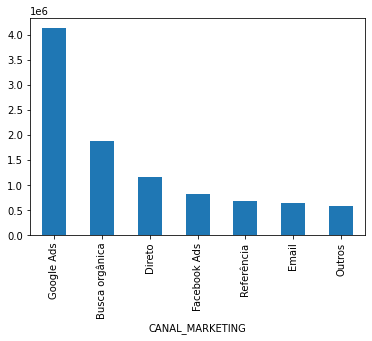

In [ ]:
m2.groupby(["CANAL_MARKETING"])['margem'].sum().sort_values(ascending=False).plot(kind = 'bar')

O canal que dá mais resultado é o Google Ads, focar mais nele

In [ ]:
ordena = m2.sort_values(['DATA_VENDA'])
# ordenar a tabela para ordem cronológica

In [ ]:
ordena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296937 entries, 31305 to 293826
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PRODUTO              296937 non-null  object 
 1   CUSTO_MERCADORIA     296937 non-null  float64
 2   LINHA_PRODUTO        290281 non-null  object 
 3   DATA_VENDA           296937 non-null  object 
 4   PEDIDO               296937 non-null  int64  
 5   PEDIDO_ERP           296937 non-null  object 
 6   COD_CLIENTE          296937 non-null  int64  
 7   QTDE                 296937 non-null  int64  
 8   PRECO_UNITARIO       296937 non-null  float64
 9   DESCONTO_ITEM        296937 non-null  float64
 10  FRETE_PAGO_CLIENTE   296937 non-null  float64
 11  RECEITA              296937 non-null  float64
 12  CUSTO_FRETE          296937 non-null  float64
 13  IDADE                296937 non-null  float64
 14  UF                   296937 non-null  object 
 15  REGIAO       

In [ ]:
# tem que passar para datetime a data
ordena['DATA_VENDA'] = pd.to_datetime(ordena['DATA_VENDA'], format='%Y-%m-%d')
#%H:%M:%S.%f

In [ ]:
ordena2020 = ordena[ordena['DATA_VENDA'].dt.year==2020]

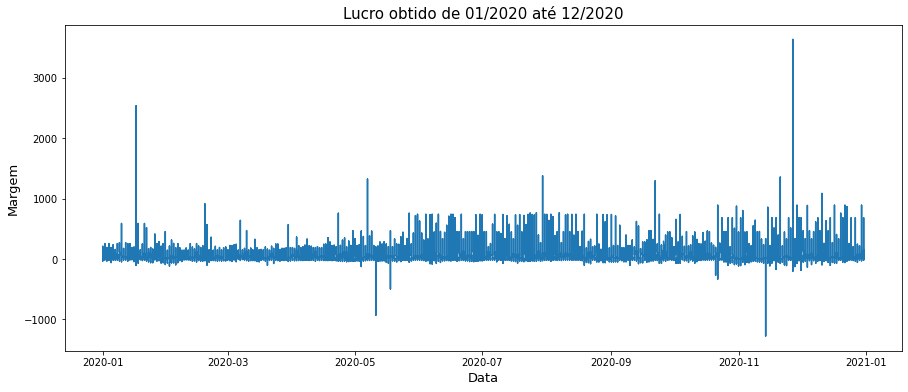

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(ordena2020['DATA_VENDA'], ordena2020['margem'])

plt.title("Lucro obtido de 01/2020 até 12/2020",fontsize=15)
plt.xlabel("Data",fontsize=13)
plt.ylabel("Margem",fontsize=13)
#plt.legend()
plt.show()

In [ ]:
k = ordena2020['DATA_VENDA'].dt.month

In [ ]:
ordena2020.groupby(k)['margem'].sum().sort_values(ascending=False)

DATA_VENDA
5     1.791817e+06
6     1.490980e+06
12    1.275840e+06
11    1.243175e+06
7     9.311277e+05
8     7.841837e+05
4     6.578801e+05
10    5.774964e+05
9     4.594557e+05
1     3.239398e+05
3     2.757318e+05
2     2.358380e+05
Name: margem, dtype: float64

In [ ]:
# Calculando agora o faturamento
ordena['MES_COMPRA']= ordena['DATA_VENDA'].dt.to_period('M')
faturamento = ordena.groupby(['MES_COMPRA'], as_index=False).agg({'RECEITA':'sum', 'PEDIDO':'count'})
faturamento

,MES_COMPRA,RECEITA,PEDIDO
0,2020-01,833134.71,8006
1,2020-02,638291.82,7790
2,2020-03,728938.62,7198
3,2020-04,1696473.80,14716
4,2020-05,4600113.86,40732
5,2020-06,3736709.75,34317
6,2020-07,2253900.77,20113
7,2020-08,1905498.46,16426
8,2020-09,1203431.74,12305
9,2020-10,1480890.49,16235


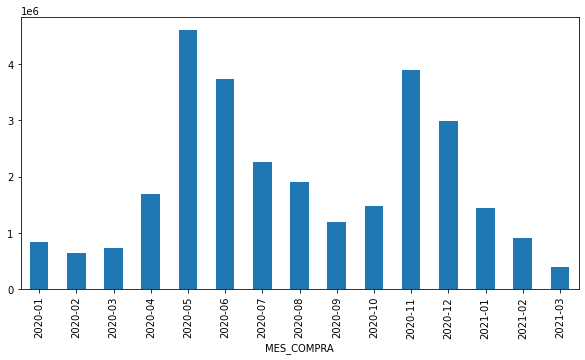

In [ ]:
faturamento.groupby(['MES_COMPRA'])['RECEITA'].sum().plot(kind='bar', stacked=True, figsize=(10,5))

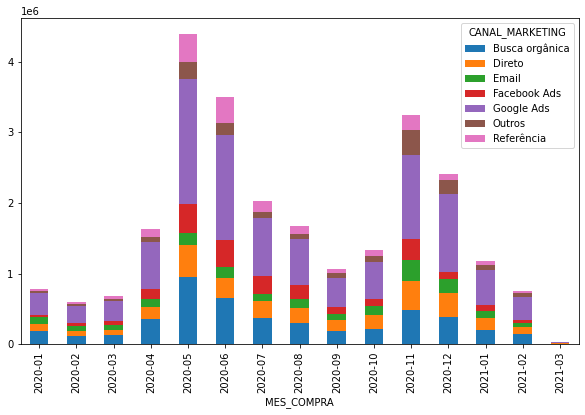

In [ ]:
# olhando a receita por canal de venda
receita_canal_mensal = ordena.groupby(['MES_COMPRA', 'CANAL_MARKETING'])['RECEITA'].sum().unstack('CANAL_MARKETING')
receita_canal_mensal.plot(kind='bar', stacked=True, figsize=(10,6))

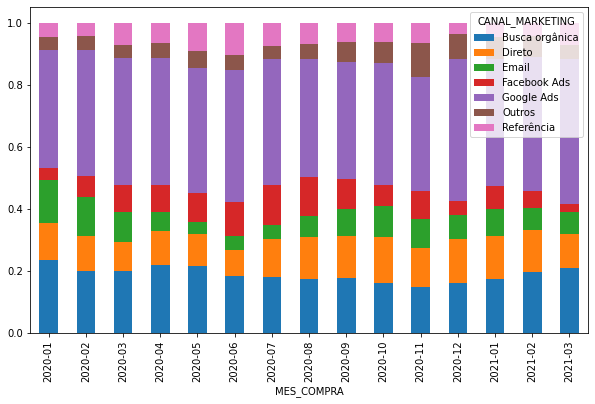

In [ ]:
# Observando melhor o impacto das receitas por canal de venda
receita_canal_mensal_100= pd.crosstab(index = ordena['MES_COMPRA'],
                                      columns = ordena['CANAL_MARKETING'],
                                      values = ordena['RECEITA'],
                                      aggfunc= 'sum',
                                      normalize ='index')
receita_canal_mensal_100.plot(kind= 'bar', stacked=True, legend= True, figsize=(10,6))